In [2]:
# Загрузка библиотек
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import sklearn

In [3]:
from sklearn import datasets
X, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
display(X)
display(y)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [4]:
bmi = X[['bmi']]

In [5]:
# Импорт класса LinearRegression из модуля linear_model пакета scikit-learn
from sklearn.linear_model import LinearRegression

# Создание экземпляра класса LinearRegression
simple_lr = LinearRegression()

# Обучение модели
simple_lr.fit(bmi, y)

# Прогнозирование целевой переменной и сохранение рузультатов в predicted_y
predicted_y = simple_lr.predict(bmi)

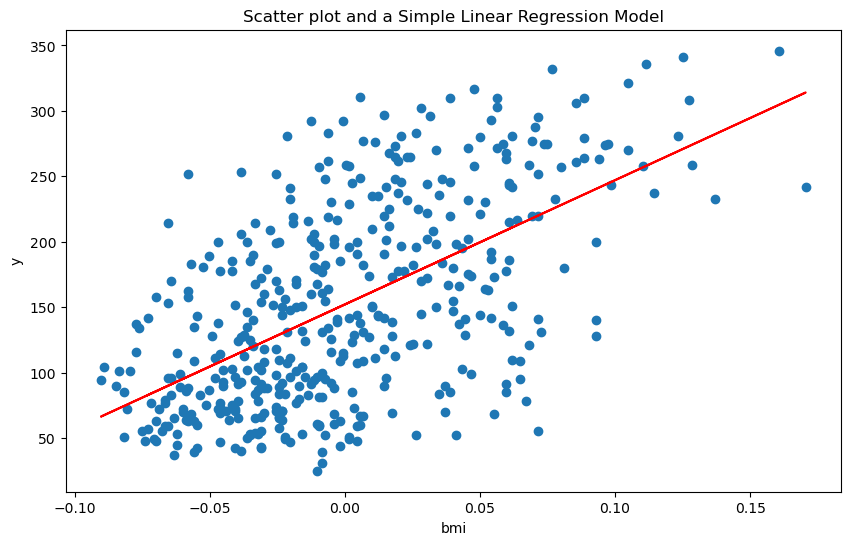

In [7]:
# Построение линии регрессии на точечной диаграмме
plt.figure(figsize=(10,6))
plt.scatter(bmi,y)
plt.plot(bmi, predicted_y, c='r')
plt.title('Scatter plot and a Simple Linear Regression Model')
plt.ylabel('y')
plt.xlabel('bmi')
plt.show()

In [8]:
# Импорт функции cross_val_score из модуля model_selection scikit-learn
from sklearn.model_selection import cross_val_score

# Сохранение десяти метрик в переменной mse
mse = cross_val_score(simple_lr,
                     bmi,
                     y,
                     scoring='neg_mean_squared_error',
                     cv=10)

# Получение среднего значения для оценки качества модели
mse.mean()
# -3906.9189901068407

-3906.9189901068407

### Добавляем еще признаки (множественная линейная регрессия)

In [11]:
# Импорт класса LinearRegression из модуля linear_model пакета scikit-learn
from sklearn.linear_model import LinearRegression

multiple_r = LinearRegression()

# Обучение модели на всех признаках
multiple_r.fit(X,y)

# Импорт функции cross_val_score из модуля model_selection scikit-learn
from sklearn.model_selection import cross_val_score

# Сохраняем массив с результатами оценки качества
mse = cross_val_score(multiple_r,
                     X,
                     y,
                     scoring='neg_mean_squared_error',
                     cv=10)
# Получение среднего значения для оценки качества модели
mse.mean()
# -3000.390290160842

-3000.390290160842

In [13]:
# Сохранение массива, содержащего все десять коэффициентов
multiple_lr_coeffs = multiple_r.coef_
multiple_lr_coeffs

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

### Построим визуализацию

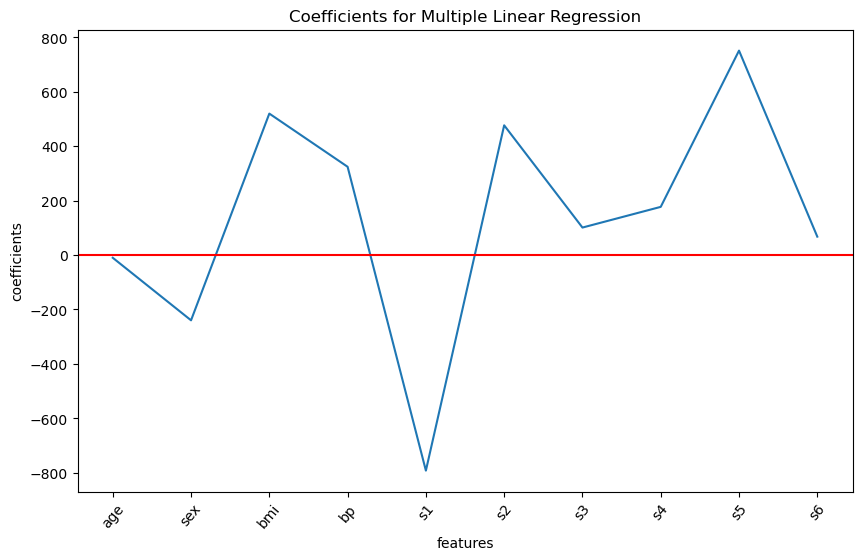

In [24]:
# Извлечение имен столбцов из датафрейма df
feature_names = X.columns

# Используем matplotlib для построения графика
plt.figure(figsize=(10,6))
plt.plot(range(len(multiple_lr_coeffs)), multiple_lr_coeffs)
plt.axhline(0,color='r', linestyle='solid')
plt.xticks(range(len(feature_names)),feature_names, rotation = 50)
plt.title("Coefficients for Multiple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [20]:
X.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


Применим Ridge-регрессию (часто называемую L2-регуляризацией)

In [21]:
# Импорт класса Ridge из модуля linear_model scikit-learn
from sklearn.linear_model import Ridge

# Импорт класса GridSearhCV из модуля model_selection scikit-learn
from sklearn.model_selection import GridSearchCV

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearhCV Ridge-модели, потенциальных альфа-значений, метрики качества
ridge = GridSearchCV(Ridge(),
                     alpha_values, 
                     scoring='neg_mean_squared_error', 
                     cv=10)
# Обучение модели
print('Лучшее значение альфа:', ridge.fit(X,y).best_params_)

# Вывод среднего значения neg_mean_squared_error
print('Метрика качества:', ridge.fit(X,y).best_score_)

# Лучшее значение alpha: {'alpha': 0.04}
# Метрика качества: -2997.195810600043

Лучшее значение альфа: {'alpha': 0.04}
Метрика качества: -2997.195810600043


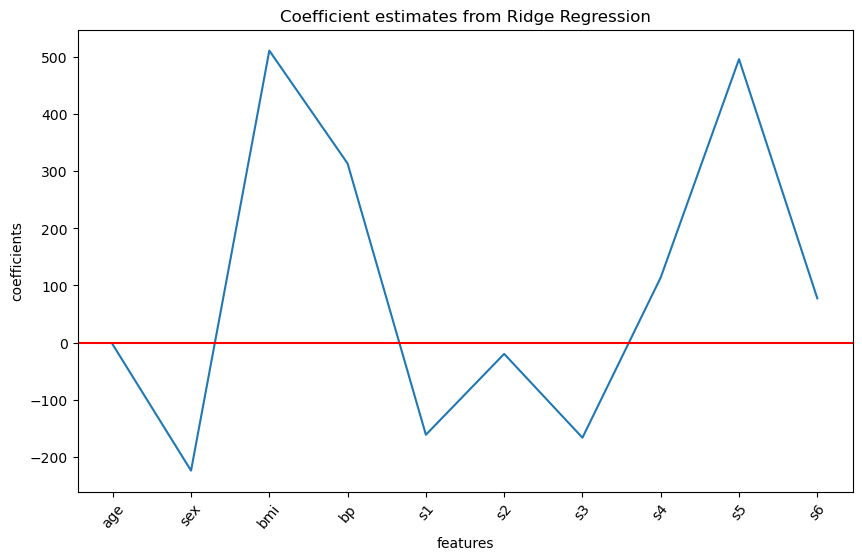

In [25]:
# Создание объекта, содержащего наилучшую модель
best_ridge_model = Ridge(alpha=0.04)

# Извлечение оценок коэффициентов для всех десяти признаков
best_ridge_coeffs = best_ridge_model.fit(X, y).coef_

# Построение графика c коэффициентами для всех десяти признаков
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_ridge_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Ridge Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [26]:
# Импорт класса Lasso из модуля linear_model scikit-learn
from sklearn.linear_model import Lasso

# Создание словаря, содержащего потенциальные значения альфа
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06,0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

# Передача в GridSearchCV модели, потенциальных альфа-значений,
# метрики качества
lasso = GridSearchCV(Lasso(),
                     alpha_values,
                     scoring='neg_mean_squared_error',
                     cv=10)

# Обучение модели 
print('Лучшее значение alpha:', lasso.fit(X, y).best_params_)

# Вывод среднего значения neg_mean_squared_error 
print('Метрика качества:', lasso.fit(X, y).best_score_)

# Лучшее значение alpha: {'alpha': 0.06}
# Метрика качества:: -2987.427517974156

Лучшее значение alpha: {'alpha': 0.06}
Метрика качества: -2987.427517974156


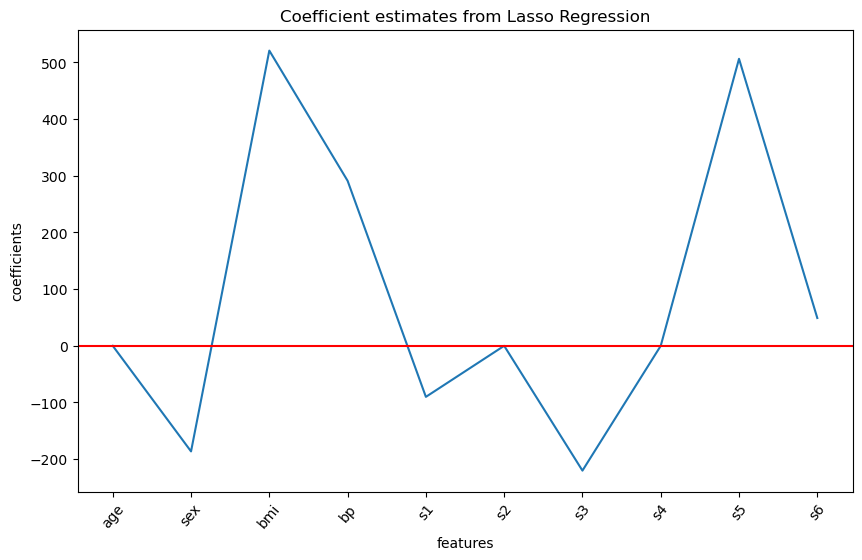

In [27]:
# Создание объекта, содержащего наилучшую Lasso-модель 
best_lasso_model = Lasso(alpha=0.06)

# сохранение значений коэффициентов для всех десяти признаков
best_lasso_coeffs = best_lasso_model.fit(X, y).coef_

# Построение графика значений коэффициентов для всех десяти объектов
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [28]:
from sklearn.linear_model import ElasticNet

alpha_values = {'alpha': [0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
                'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
                
elastic = GridSearchCV(ElasticNet(),
                       alpha_values,
                       scoring='neg_mean_squared_error',
                       cv=10)

In [30]:
print(elastic.fit(X, y).best_params_)
# {'alpha': 0.06, 'l1_ratio': 1}

print(elastic.fit(X, y).best_score_)
# -2987.427517974156

{'alpha': 0.06, 'l1_ratio': 1}
-2987.427517974156


In [31]:
# Создание датафрейма, содержащего коэффициенты трёх моделей
comparing_models = pd.DataFrame({'without_regularization': multiple_lr_coeffs,
                                 'Ridge': best_ridge_coeffs,
                                 'Lasso': best_lasso_coeffs},
                                 index=feature_names)
                                                                  
display(comparing_models) 

,without_regularization,Ridge,Lasso
age,-10.009866,-3.608028,-0.000000
sex,-239.815644,-224.326649,-186.306130
bmi,519.845920,511.208549,520.899185
bp,324.384646,313.546639,291.190370
s1,-792.175639,-161.534326,-90.067647
s2,476.739021,-19.891350,-0.000000
s3,101.043268,-166.678043,-220.205335
s4,177.063238,113.949582,0.000000
s5,751.273700,496.221181,506.420575
s6,67.626692,77.444821,49.075831


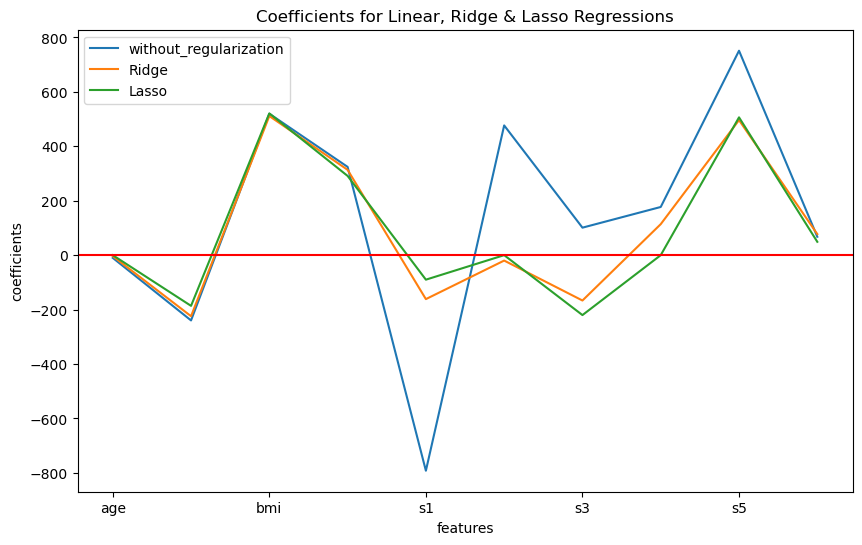

In [32]:
comparing_models.plot(figsize = (10, 6))
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.title("Coefficients for Linear, Ridge & Lasso Regressions")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()